In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
###Set constants and parameters

##input params
H = 0.42 #no units,ratio #Hematocrit assumed to be constant
M = 20e-9 #mol_ O2/(mL/s) #Taken from table 2 from Wiley Payne paper
cHb = 0.2 #mL_O2/m #Taken from table 2 from Wiley Payne paper
paO2_bar_t = 15 #mmHG #Taken from table 2 from Wiley Payne paper

##SI them
#M = M*10e3
#cHb = cHb*10e-3
#paO2_bar_t = paO2_bar_t*133.322

###Set up input data

##reset df
df = None

##Input data
#all data taken from Payne article
df = pd.DataFrame({'Name': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'C', 'V6', 'V5', 'V4', 'V3', 'V2', 'V1'], 
                   'Number': [1, 2, 4, 8, 16, 32, 64, 32, 16, 8, 4, 2, 1],
                   'Diameter(µm)': [23.97, 19.17, 15.28, 12.08, 9.46, 7.32, 8, 11.51, 14.53, 17.79, 21.45, 25.70, 30.77]
                  })

df['X-Area wall(µ^2)'] = np.pi * ( 0.16*(df['Diameter(µm)'])**2 + 1.4*(df['Diameter(µm)']) + 14 )
df['term_1'] = 0.16*(df['Diameter(µm)'])**2
df['term_2'] = 1.4*(df['Diameter(µm)'])
df['wall thickness(µ)'] = ( -(df['Diameter(µm)']) + np.sqrt((df['Diameter(µm)'])**2 + (4*(df['X-Area wall(µ^2)'])/np.pi)) ) / 2

In [4]:
df

,Name,Number,Diameter(µm),X-Area wall(µ^2),term_1,term_2,wall thickness(µ)
0,A1,1,23.97,438.213672,91.929744,33.558,4.841407
1,A2,2,19.17,313.016429,58.798224,26.838,4.253658
2,A3,4,15.28,228.546291,37.356544,21.392,3.810683
3,A4,8,12.08,170.463521,23.348224,16.912,3.485850
4,A5,16,9.46,130.572935,14.318656,13.244,3.265971
5,A6,32,7.32,103.110791,8.573184,10.248,3.138293
6,C,64,8.00,111.338044,10.240000,11.200,3.172168
7,V6,32,11.51,161.197683,21.196816,16.114,3.433626
8,V5,16,14.53,214.009514,33.779344,20.342,3.730525
9,V4,8,17.79,281.309064,50.637456,24.906,4.092089


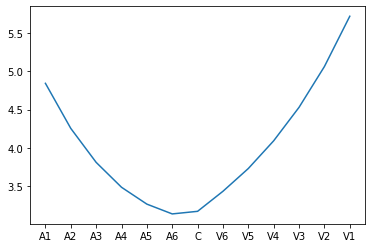

In [5]:
plt.plot(df['Name'],df['wall thickness(µ)'])